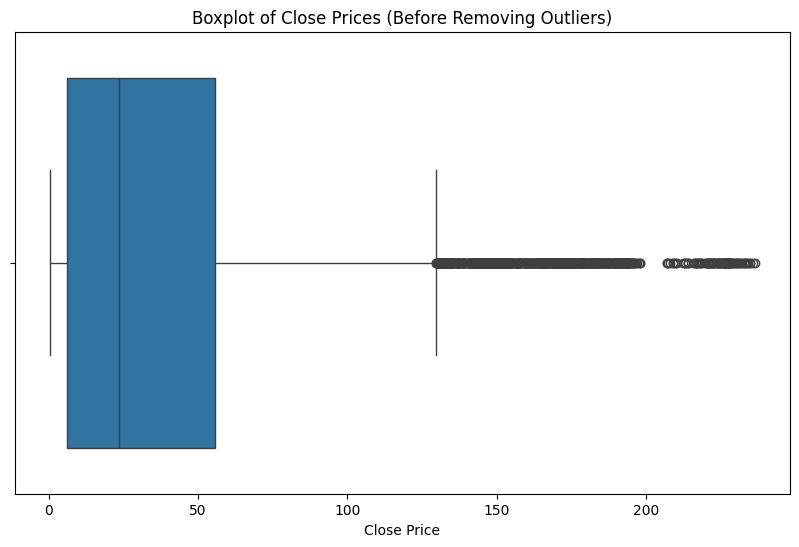

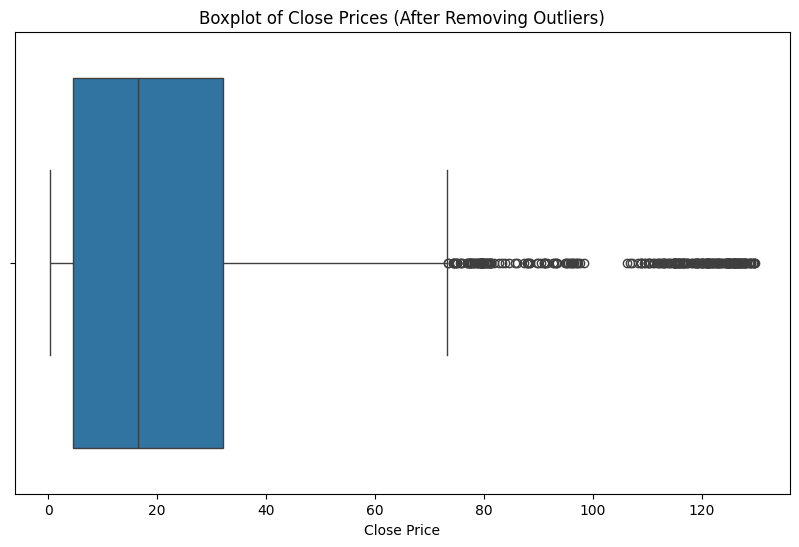

Number of outliers removed: 911


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('apple_stock_data_2004_2024.csv', parse_dates=['Date'], index_col='Date')

# Convert 'Close' column to numeric, handling errors
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Visualize the data before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Close'])
plt.title('Boxplot of Close Prices (Before Removing Outliers)')
plt.xlabel('Close Price')
plt.show()

# Calculate the IQR for the 'Close' column
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Close'] < lower_bound) | (data['Close'] > upper_bound)]

# Remove outliers
data_cleaned = data[(data['Close'] >= lower_bound) & (data['Close'] <= upper_bound)]

# Visualize the data after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Close'])
plt.title('Boxplot of Close Prices (After Removing Outliers)')
plt.xlabel('Close Price')
plt.show()

# Print the number of outliers removed
print(f"Number of outliers removed: {len(outliers)}")

In [ ]:
#Save the cleaned dataset
data_cleaned.to_csv('App_hist_cleaned_dataset.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('App_hist_cleaned_dataset.csv')

In [ ]:
# Data Cleaning
# Drop unnecessary columns
df = df[['Close']]

# Check for missing values
df.isnull().sum()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [ ]:
# Prepare the dataset for LSTM
def create_dataset(data, time_step=28):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 28
X, Y = create_dataset(scaled_data, time_step)

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, Y_train, batch_size=64, epochs=50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0050
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.6681e-05
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1740e-05
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 2.2254e-05
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 2.2010e-05
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.2573e-05
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1636e-05
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.0790e-05
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 1.9786e-05
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.0883e-05
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.8973e-05
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.9617e-05
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.1447e-05
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.8086e-05
Epoch 15/50
54/54 ━

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([Y_test])

In [ ]:
mse = mean_squared_error(Y_test_inv[0], test_predict[:, 0])
mae = mean_absolute_error(Y_test_inv[0], test_predict[:, 0])
r2 = r2_score(Y_test_inv[0], test_predict[:, 0])

print('MSE:',mse)
print('MAE',mae)
print('R2',r2)

MSE: 6.695126629221755
MAE 1.811109009656981
R2 0.9920758442439787


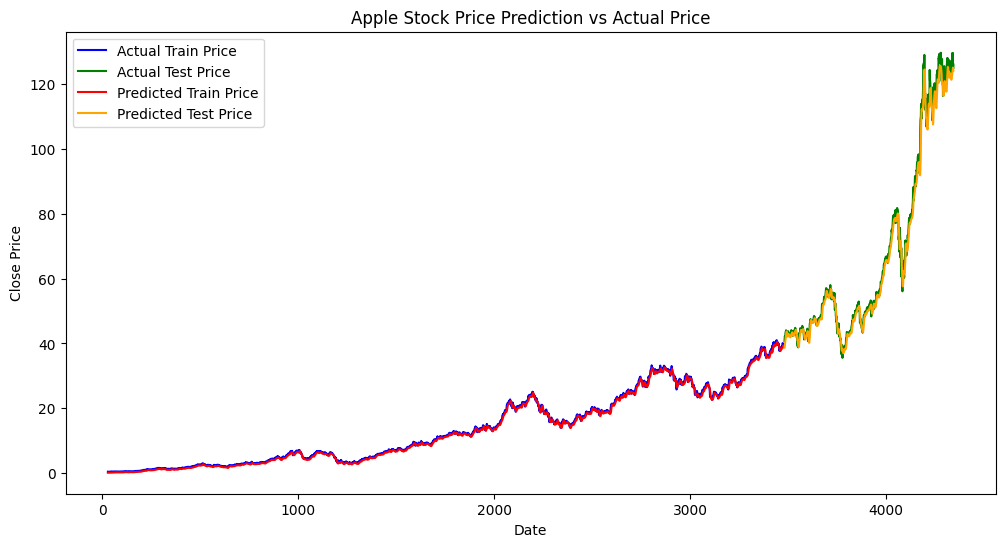

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[time_step:train_size + time_step], Y_train_inv[0], label='Actual Train Price', color='blue')
plt.plot(df.index[train_size + time_step + 1:len(df)], Y_test_inv[0], label='Actual Test Price', color='green')
plt.plot(df.index[time_step:train_size + time_step], train_predict[:, 0], label='Predicted Train Price', color='red')
plt.plot(df.index[train_size + time_step + 1:len(df)], test_predict[:, 0], label='Predicted Test Price', color='orange')
plt.title('Apple Stock Price Prediction vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()